In [165]:
import numpy as np
import tensorflow as tf # only these two packages required
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
tf.reset_default_graph()

In [167]:
x = tf.placeholder(tf.float32)
y = tf.square(x)

In [168]:
y

<tf.Tensor 'Square:0' shape=<unknown> dtype=float32>

In [169]:
sess = tf.InteractiveSession()

In [170]:
y.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  1.,   4.,   9.,  16.,  25.], dtype=float32)

In [171]:
# define the gradients of y with respect to x
dy_dx = tf.squeeze(tf.stack(tf.gradients(y, x)))

In [172]:
dy_dx

<tf.Tensor 'Squeeze:0' shape=<unknown> dtype=float32>

In [173]:
dy_dx.eval(feed_dict={x: 4})

8.0

In [174]:
dy_dx.eval(feed_dict={x: [1, 2, 3, 4, 5]})

array([  2.,   4.,   6.,   8.,  10.], dtype=float32)

In [182]:
g = 9.8; mu = 5.4

In [183]:
acceleration = (g * (dy_dx + (-tf.sign(dy_dx) * mu))) / tf.sqrt(1 + tf.square(dy_dx))

In [184]:
acceleration.eval(feed_dict={x: 100})

9.5352812

# Define the simulation of these values

In [185]:
start_position = 300

In [202]:
position = start_position; velocity = 0 # initial velocity is 0
y_values = [position]

for _ in range(100):
    print "X = " + str(position) + " V = " + str(velocity)
    a = acceleration.eval(feed_dict={x: position})
    print "obtained_acceleration = " + str(a) + "\n"
    
    # now update the velocity and the position
    velocity = velocity + a
    position = position - (velocity + (a / 2))
    
    y_values.append(position)

X = 300 V = 0
obtained_acceleration = 9.71179

X = 285.432320595 V = 9.71178627014
obtained_acceleration = 9.70728

X = 261.159608364 V = 19.4190702438
obtained_acceleration = 9.69866

X = 227.192542553 V = 29.1177339554
obtained_acceleration = 9.68351

X = 183.549540997 V = 38.8012456894
obtained_acceleration = 9.65581

X = 130.264585495 V = 48.4570522308
obtained_acceleration = 9.5968

X = 67.4123263359 V = 58.0538568497
obtained_acceleration = 9.40723

X = -4.75237751007 V = 67.4610881805
obtained_acceleration = -4.20903

X = -65.8999218941 V = 63.2520589828
obtained_acceleration = -9.39821

X = -115.054665089 V = 53.8538484573
obtained_acceleration = -9.56993

X = -154.55361557 V = 44.2839164734
obtained_acceleration = -9.62875

X = -184.394411564 V = 34.655169487
obtained_acceleration = -9.65647

X = -204.564878464 V = 24.9987010956
obtained_acceleration = -9.67062

X = -215.05764389 V = 15.3280773163
obtained_acceleration = -9.67694

X = -215.870315552 V = 5.65114021301
obtained_

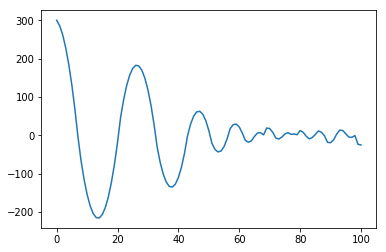

In [204]:
plt.plot(y_values)

In [214]:
position

-25.470125645399094